**Index 간략 정리**

- Index는 DB의 테이블에 데이터가 많을 때, 검색 속도를 향상시켜주기위해 사용.

- 일반적으로 Index에 비유되는 예가 책의 색인 혹은 목차.
 - 책에 색인이 없다면 '길로그'라는 단어가 몇 페이지에 있는지 찾기 위해 책의 첫 페이지부터 차례대로 찾아야 하고, 최악의 경우 마지막 페이지에 도달해서야 '길로그'라는 단어를 찾게 될 것.
 - 하지만 색인이 있다면, 한번에 '길로그'가 있는 곳으로 찾아 갈 수 있다.
 - 이를 해결하기 위해 책에서는 색인, DB에서는 Index를 사용.

**Index 사용 특징**

- Index를 사용하면 검색 속도의 향상 효과를 볼 수 있다.(시스템 부하를 줄여, 시스템 전체 성능향상에 기여 가능)
-  Index를 위한 추가 공간이 필요하고, 데이터가 많이 있다면 생성에 많은 시간이 소요 될 수 있다.

- INSERT, UPDATE, DELETE가 자주 발생한다면 성능이 많이 하락할 수 있다.

**Index 생성**

- Index는 열 단위로 생성되는데, 하나의 열에 Index를 생성할 수 있고, 여러 열에 하나의 Index를 생성 할 수도 있다.

- 테이블 생성시 하나의 열에 Primary Key를 지정하면 자동으로 Clustered Index가 생성.[Clustered Index가 없는 경우]

- UNIQUE 제약 조건이 있는 테이블을 만들면 데이터베이스 엔진에서는 자동으로 Non-Clustered Index를 만든다.

- Primary Key를 지정하는 열에 강제적으로 Non-Clustered Index를 지정 가능.

- 기존 테이블에 PRIMARY KEY 제약 조건을 적용하려 하거나 해당 테이블에 Clustered Index가 이미 있으면 Non-Clustered Index를 사용하여 기본 키를 적용.

- 제약 조건 없이 테이블 생성시에 Index를 만들 수 없으며, Index가 자동 생성되기 위한 열의 제약 조건은 Primary Key또는 Unique 뿐.


-  Index에는 Clustered Index와 Non-Clustered Index 두 종류가 존재.

# **Clustered Index**

- Clustered Index를 책으로 비유하자면 페이지를 알고 있어서 바로 해당 페이지를 펼치는 것과 같다.

- Clustered Index는 테이블의 데이터를 지정된 컬럼에 대해 물리적으로 데이터를 재배열.[Index를 생성할 때는 데이터 페이지 전체를 다시 정렬]

- 데이터가 테이블에 삽입되는 순서에 상관없이 Index로 생성되어 있는 컬럼을 기준으로 정렬되어 삽입.[데이터 삽입, 수정, 삭제시 테이블의 데이터를 정렬]

- Index Page를 키값과 데이터 페이지 번호로 구성하고, 검색하고자하는 데이터의 키 값으로 페이지 번호를 검색하여 데이터를 찾는다.

- Clustered Index는 테이블 당 한개씩만 존재 가능하다.
 - 테이블에서 Index를 걸면 가장 효율적일거 같은 컬럼을 Clustered Index로 지정

- 테이블에 데이터가 많이 저장된 상태에서 ALTER를 통해 Clustered Index를 추가한다면, 많은 데이터를 정렬해야 해서 많은 리소스를 차지하게 된다.
 - 사용자가 많은 시간에는 함부로 Clustered Index를 추가하면 안됨

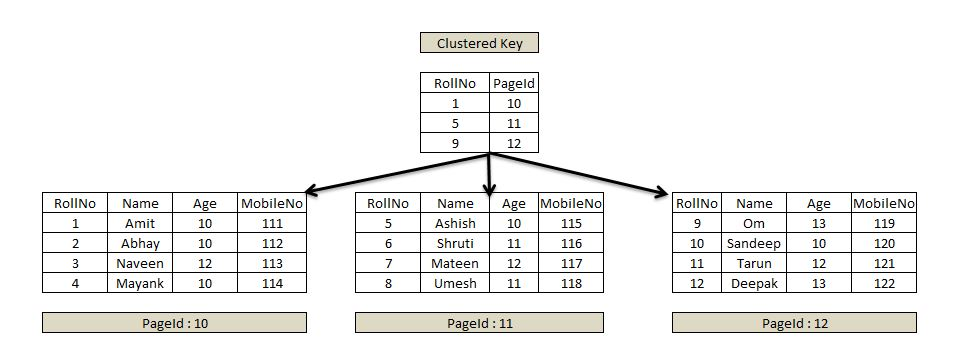

**Clustered Index 방식**

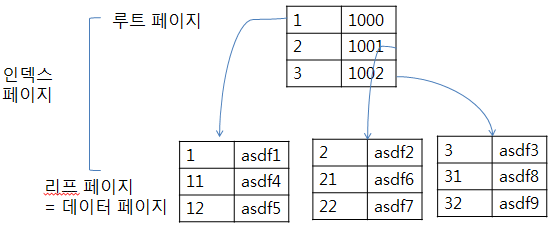

- Clustered Index를 구성하기 위해서 행 데이터를 해당 열로 정렬한 후에, 루트 페이지를 만들게 된다.

- Clustered Index는 루트 페이지와 리프 페이지로 구성되며, 리프 페이지는 데이터 그 자체.
 - Index 자체에 데이터가 포함

- Clustered Index 물리적으로 정렬되어 있어 검색 속도가 Non-Clustered Index 보다 더 빠르다.
- 데이터의 입력/수정/삭제 시에도 정렬을 수행하여 입력/수정/삭제 속도는 더 느리다.

# **Non-Clustered Index**

- Non-Clustered Index를 책으로 비유하자면 목차에서 찾고자 하는 내용의 페이지를 찾고나서 해당 페이지로 이동하는것과 같다.

- Non-Clustered Index는 물리적으로 데이터를 배열하지 않은 상태로 데이터 페이지가 구성된다.
 - 테이블의 데이터는 그대로두고 지정된 컬럼에 대해 정렬시킨 인덱스를 만들 뿐이다.

- Non-Clustered Index는 Clustered Index보다 검색 속도는 느리지만, 데이터의 입력/수정/삭제는 더 빠르다.

- Non-Clustered Index는 테이블 당 여러개 존재 가능하다.
- 함부로 남용하면 오히려 시스템 성능을 떨어뜨린다.



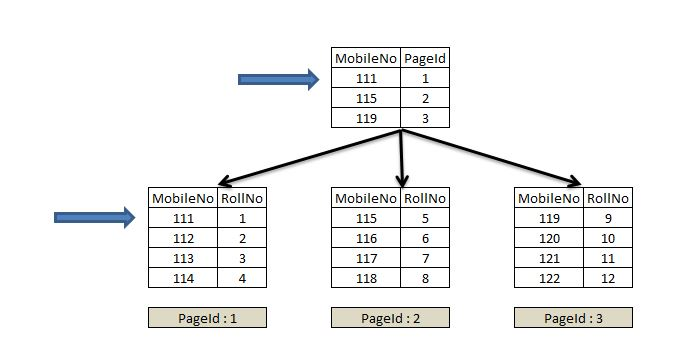

**Non-Clustered Index 방식**

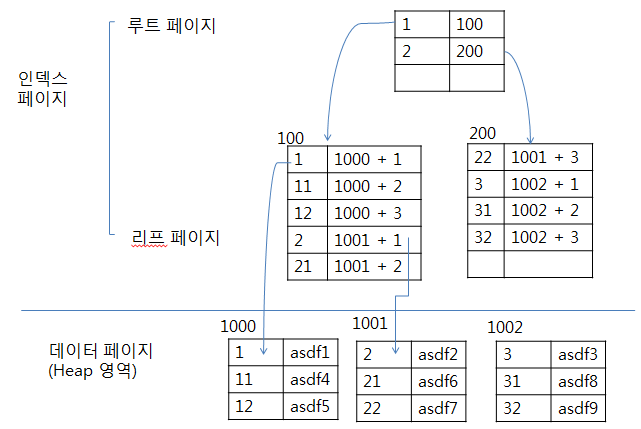

- Non-Clustered Index는 데이터 페이지를 건드리지 않고, 별도의 장소에 인덱스 페이지를 생성.

- Non-Clustered Index의 인덱스 페이지는 키값(정렬하여 인덱스 페이지 구성)과 RID로 구성.

- 인덱스 페이지의 리프 페이지에 Index로 구성한 열을 정렬한 후 위치 포인터(RID)를 생성.

- Non-Clustered Index에서 인덱스 자체의 리프 페이지는 데이터가 아니라, 데이터가 위치하는 포인터(RID)다.[RID는 '파일그룹번호-데이터페이지번호-데이터페이지오프셋'으로 구성되는 포인팅 정보]

- 위처럼 리프 페이지(중간 레벨 인덱스 페이지)들을 생성하고, 이 리프 페이지를 찾기위한 루트 페이지(루트 레벨 인덱스 페이지)를 생성.

- 검색하고자하는 데이터의 키 값을 루트 페이지에서 비교하여 리프 페이지 번호를 찾고, 리프 페이지에서 RID 정보로 실제 데이터의 위치로 이동.


- EX
 -  12 검색위해 루트 페이지에서 파일 그룹번호 1에 해당하는 리프 페이지 100번으로 이동,
 - 리프 페이지 100번에서 12는 데이터 페이지 1000번의 데이터페이지오프셋 3으로 되어 있음,
 - 데이터 페이지 1000번으로 이동 후 3번째 컬럼으로 이동.
 - 12, asdf5 검색 완료



**Clustered Index & Non-Clustered Index 통합 그림**

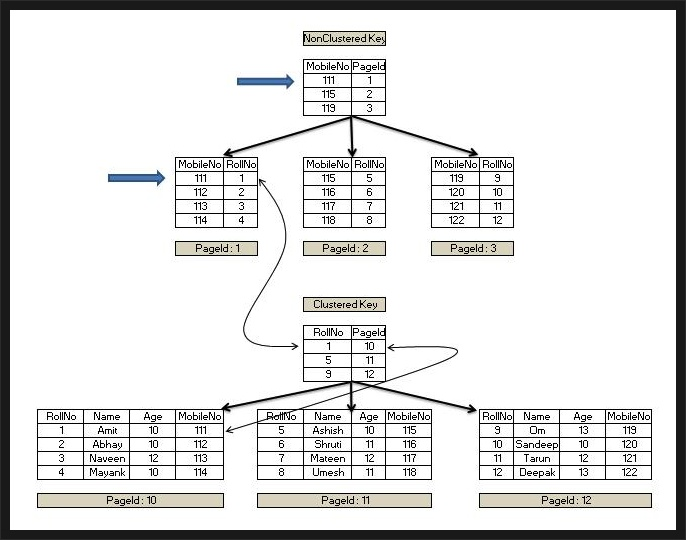